# Testing HotVis on the household graph

In [1]:
import csv
from HotVisFunctions import *
import pandas as pd

In [2]:
households = pd.read_csv('graphs/Households/network/edges.csv')
households['hour'] = 24 *(households['day']-1) + households['hour']
households_new = households[['source', 'target', 'hour']].rename(columns={
    'source': 'v',
    'target': 'w',
    'hour': 't'
})

households_new.to_csv('graphs/Households/network/edges_without_day.csv', index=False)


In [3]:
# load graph
household_graph = pp.io.read_csv_temporal_graph('graphs/Households/network/edges_without_day.csv', is_undirected = True, timestamp_format='%d,%h')
# load metadata
meta_data = pd.read_csv("graphs/Households/network/nodes.csv")


Every class gets its own color.

In [4]:
print(meta_data["house"].unique())

['L' 'E' 'F' 'B' 'H']


In [5]:
colors = {}
color_map = {'L': 'yellow', 'E': 'green', 'F': 'blue', 'B':'pink', 'H':'black'}
for index, row in meta_data.iterrows():
        colors[f"{row['index']}"] = color_map[row['house']]
style = {}
style['node_color'] = colors
style['node_size'] = 10
style['edge_size'] = 0.1
style['edge_opacity'] = 0


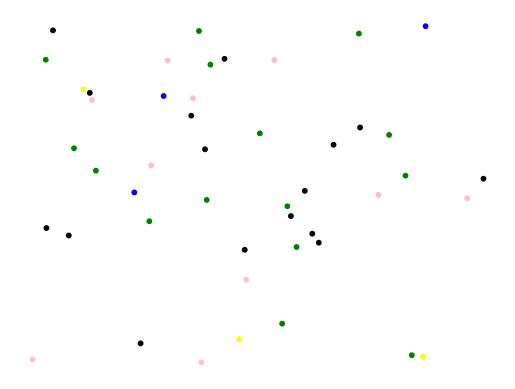

In [6]:
pp.plot(household_graph.to_static_graph(), backend='matplotlib' ,**style)

In [7]:
layout_2 =  HotVis(household_graph, 2, 50000, 1, alpha=[1, 0.5], force=10)
#layout_3 =  HotVis(household_graph, 3, 50000, 1, alpha=[1, 0.5, 0.3], force=10)
#layout_5 =  HotVis(household_graph, 5, 50000, 1, alpha=[1, 0.5, 0.3, 0.25, 0.2], force=10)


100%|██████████| 50000/50000 [00:06<00:00, 7965.53it/s]


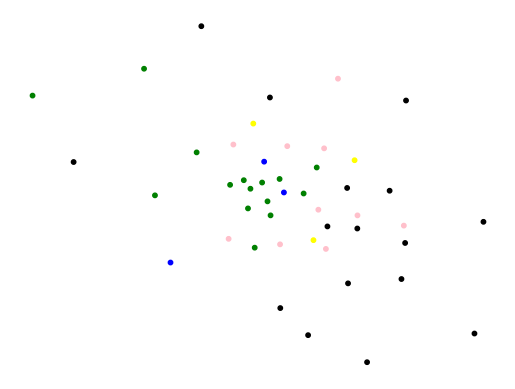

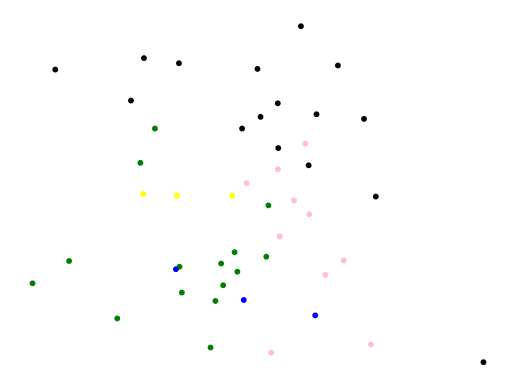

In [8]:
pp.plot(household_graph.to_static_graph(), layout=layout_2, backend='matplotlib' ,**style)
#pp.plot(household_graph.to_static_graph(), layout=layout_3, backend='matplotlib' ,**style)
#pp.plot(household_graph.to_static_graph(), layout=layout_5, backend='matplotlib' ,**style)
pp.plot(household_graph.to_static_graph(), layout="fr", backend='matplotlib' ,**style)